# Lottery Analysis

Powerball is an American lottery game where a player selects five numbers between `1` and `69`. These five numbers are the five `white balls`. In addition, a player selects one number between `1` and `26`. This number is the `red Powerball`, which acts as a multiplier.

Players can choose their numbers on a play slip or let the lottery terminal randomly pick their numbers.

## Project Overview

Overview

## Dataset Overview


In [1]:
import csv # Python library used for reading and writing tabular data in CSV format.
import pandas as pd # Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. 
import json # Python library for encoding and decoding custom objects by using JSON encoder and decoder classes.
import numpy as np # Python library for adding support to large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import seaborn as sns #Python library for statistical visualizations
import statistics as stat #Python library for statistical operations
import matplotlib.pyplot as plt # Python library for creating graphs
from scipy import stats # Python library for linear regression

In [2]:
lottery = pd.read_csv("Lottery_Powerball_Winning_Numbers__Beginning_2010.csv")

In [3]:
lottery.dtypes

Draw Date           object
Winning Numbers     object
Multiplier         float64
dtype: object

After conducting an initial inspection of the data, we have three variables: 
- `Draw Date`: an **object** type value, the `Draw Date` is the date that a particular draw was held.
- `Winning Numbers`: an **object** type value, there are two types of balls to be drawn
    - the first five `Winning Numbers` are `white ball`s which are numbered `1` to `69`
    - the last of the `Winning Numbers` is a `red ball`, which is numbered `1` to `26`.
- `Multiplier`: a **float64** type value, the `Multiplier` is a number that is randomly drawn from `2`, `3`, `4`, `5`, or `10` prior to the `Winning Numbers` draw. This value can *multiply* non-jackpot prizes by the drawn amount. The `10`x `Multiplier` is only in play when the advertised jackpot annuity is $150 million or less.

In order to utilize the values of the `Winning Numbers`, we will creating new columns based off of `Winning Numbers`.

In [4]:
# Define a new list of just the Winning Numbers
winning_numbers = lottery["Winning Numbers"]

# Define empty lists for each winning number position
winning_number_first = []
winning_number_second = []
winning_number_third = []
winning_number_fourth = []
winning_number_fifth = []
winning_number_sixth = []

# Loop over each of the Winning Numbers to append the empty lists above
for number in winning_numbers:
    first = number[0:2]
    winning_number_first.append(first)
    
    second = number[3:5]
    winning_number_second.append(second)
    
    third = number[6:8]
    winning_number_third.append(third)
    
    fourth = number[9:11]
    winning_number_fourth.append(fourth)
    
    fifth = number[12:14]
    winning_number_fifth.append(fifth)
    
    sixth = number[15:]
    winning_number_sixth.append(sixth)
    
# Create new columns in lottery
lottery["First Winning Number"] = winning_number_first
lottery["Second Winning Number"] = winning_number_second
lottery["Third Winning Number"] = winning_number_third
lottery["Fourth Winning Number"] = winning_number_fourth
lottery["Fifth Winning Number"] = winning_number_fifth
lottery["Red Ball Number"] = winning_number_sixth

# Change the Types of the newly created columns
lottery["First Winning Number"] = lottery["First Winning Number"].astype("int")
lottery["Second Winning Number"] = lottery["Second Winning Number"].astype("int")
lottery["Third Winning Number"] = lottery["Third Winning Number"].astype("int")
lottery["Fourth Winning Number"] = lottery["Fourth Winning Number"].astype("int")
lottery["Fifth Winning Number"] = lottery["Fifth Winning Number"].astype("int")
lottery["Red Ball Number"] = lottery["Red Ball Number"].astype("int")

## White Balls vs Red Balls
We will now take our updated `lottery` DataFrame and create new DataFrames to capture `White Balls` and `Red Balls`.

In [5]:
# Define an empty list
white_numbers = []
red_numbers = []

# Define a function to append numbers from a list to all_numbers
def transfer_number(numbers, append_list):
    for number in numbers:
        append_list.append(number)

# Use transfer_number to append all_numbers
transfer_number(winning_number_first, white_numbers)
transfer_number(winning_number_second, white_numbers)
transfer_number(winning_number_third, white_numbers)
transfer_number(winning_number_fourth, white_numbers)
transfer_number(winning_number_fifth, white_numbers)
transfer_number(winning_number_sixth, red_numbers)

# Transform the lists into a Pandas DataFrame
all_white_numbers = pd.DataFrame({"Number": white_numbers})
all_red_numbers = pd.DataFrame({"Number": red_numbers})

# Define the type of Number as int
all_white_numbers["Number"] = all_white_numbers["Number"].astype("int")
all_red_numbers["Number"] = all_red_numbers["Number"].astype("int")
#print(len(lottery)) # Output: 1529
#print(len(all_white_numbers)) # Output: 7645
#print(len(all_red_numbers)) # Output: 1529

Now that we have the DataFrames `all_white_numbers` and `all_red_numbers`, we will visualize the frequency of each of the numbers drawn.

We will assume that each `White Ball` has an equal chance of being drawn on any given drawing. Since we have 1,529 observations in our `lottery` dataset, and since we have `5` drawings for `White Balls` in each drawing, the total number of `White Balls` drawn is `7,645`. Therefore, we should expect that each number, from `1` to `69`, should be drawn

$$ \frac{7645}{69} ≈ 110.8 \text{ times.} $$

We will also assume that each `Red Ball` has an equal chance of being drawn on any given drawing. Since we have 1,529 observations in our `lottery` dataset, and since there is only `1` drawing of `Red Balls` per drawing, then the total number of `Red Balls` drawn is `1,529`. Therefore, we should expect that each number, from `1` to `26`, should be drawn

$$ \frac{1529}{26} ≈ 58.8 \text{ times.} $$

We will now create a Table of Frequency and a Table of Relative Frequency for both `all_white_numbers` and `all_red_numbers`.

In [6]:
# Create a Table of Frequency and Relative Frequency for each White Ball
all_white_frequency = all_white_numbers["Number"].value_counts(normalize = False).reset_index().sort_values("Number")
all_white_relative_frequency = all_white_numbers["Number"].value_counts(normalize = True).reset_index().sort_values("Number")

# Create a Table of Frequency and Relative Frequency for each Red Ball
all_red_frequency = all_red_numbers["Number"].value_counts(normalize = False).reset_index().sort_values("Number")
all_red_relative_frequency = all_red_numbers["Number"].value_counts(normalize = True).reset_index().sort_values("Number")


After creating our tables, we will visualize the data using bar charts. 

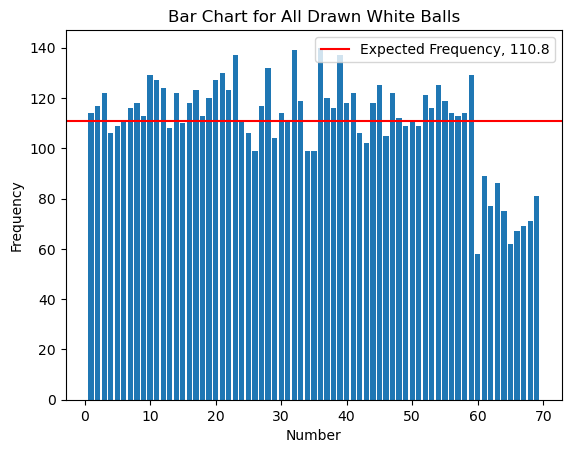

In [7]:
# Create a Bar Chart
plt.bar(all_white_frequency["Number"],
       all_white_frequency["count"])

# Create the expected value for frequency
expected_value = len(all_white_numbers) / 69

# Plot the expected_value
plt.axhline(y = expected_value, color = "red", label = "Expected Frequency, 110.8")

# Create Labels
plt.title("Bar Chart for All Drawn White Balls")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.legend()

# Show and Close the Plot
plt.show()
plt.close()

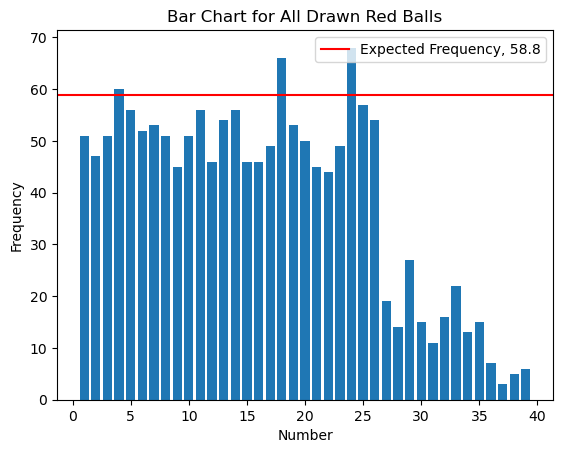

In [8]:
# Create a Bar Chart
plt.bar(all_red_frequency["Number"],
       all_red_frequency["count"])

# Create the expected value for frequency
expected_value = len(all_red_numbers) / 26

# Plot the expected_value
plt.axhline(y = expected_value, color = "red", label = "Expected Frequency, 58.8")

# Create Labels
plt.title("Bar Chart for All Drawn Red Balls")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.legend()

# Show and Close the Plot
plt.show()
plt.close()

Our graphs show some interesting discoveries. First, there is an overwhemingly large gap from the expected line of 110.8 to `59` through `69` in the **Bar Chart for All Drawn White Balls**. Second, we are seeing `Red Balls` drawn with a value greater than `26`. What is going on?

## The Powerball 2015 Format Change

The Powerball format changed on October 4, 2015. The `White Ball` pool **increased** from `59` to `69`, while the Powerball `Red Ball` pool **decreased** from `35` to `26`. This ultimately made it easier to win *a prize* but more difficult to win *the grandprize*. 

See [Wikipedia's Article](https://en.wikipedia.org/wiki/Powerball#:~:text=joined%20Mega%20Millions.-,2015%20format%20change,-%5Bedit%5D) detailing the new rule changes and the [Los Angeles Times](https://www.latimes.com/business/hiltzik/la-fi-mh-powerball-rules-were-tweaked-20160112-column.html) artile for more details on the rule change.

We will need to create a new DataFrame to make sure our data is following the current rule structure.

In [9]:
# Create new columns to gather data on the date
lottery["Draw Month"] = lottery["Draw Date"].apply(lambda x: x.split("/")[0]).astype("int")
lottery["Draw Day"] = lottery["Draw Date"].apply(lambda x: x.split("/")[1]).astype("int")
lottery["Draw Year"] = lottery["Draw Date"].apply(lambda x: x.split("/")[2]).astype("int")

To be safe, we will use all drawings starting on `January 2016` since the rule change was on `October 4, 2015`.

In [10]:
# Create a new DataFrame with only data post-rule change
lottery = lottery[lottery["Draw Year"] >= 2016]

We will now repeat the steps to create a Bar Chart to visualize the drawn numbers for `White Balls` and `Red Balls`.

In [11]:
lottery.head()

,Draw Date,Winning Numbers,Multiplier,First Winning Number,Second Winning Number,Third Winning Number,Fourth Winning Number,Fifth Winning Number,Red Ball Number,Draw Month,Draw Day,Draw Year
0,09/26/2020,11 21 27 36 62 24,3.0,11,21,27,36,62,24,9,26,2020
1,09/30/2020,14 18 36 49 67 18,2.0,14,18,36,49,67,18,9,30,2020
2,10/03/2020,18 31 36 43 47 20,2.0,18,31,36,43,47,20,10,3,2020
3,10/07/2020,06 24 30 53 56 19,2.0,6,24,30,53,56,19,10,7,2020
4,10/10/2020,05 18 23 40 50 18,3.0,5,18,23,40,50,18,10,10,2020


In [12]:
# Define an empty list
white_numbers = []
red_numbers = []

# Use transfer_number to append all_numbers
transfer_number(lottery["First Winning Number"], white_numbers)
transfer_number(lottery["Second Winning Number"], white_numbers)
transfer_number(lottery["Third Winning Number"], white_numbers)
transfer_number(lottery["Fourth Winning Number"], white_numbers)
transfer_number(lottery["Fifth Winning Number"], white_numbers)
transfer_number(lottery["Red Ball Number"], red_numbers)

# Transform the lists into a Pandas DataFrame
all_white_numbers = pd.DataFrame({"Number": white_numbers})
all_red_numbers = pd.DataFrame({"Number": red_numbers})

# Define the type of Number as int
all_white_numbers["Number"] = all_white_numbers["Number"].astype("int")
all_red_numbers["Number"] = all_red_numbers["Number"].astype("int")
#print(len(lottery)) # Output: 913
#print(len(all_white_numbers)) # Output: 4565
#print(len(all_red_numbers)) # Output: 913

After cleaning our dataset to consider the **Powerball 2015 Format Change**, we now have `913` observations in `lottery`.

Now that we have the new DataFrames `all_white_numbers` and `all_red_numbers`, we will visualize the frequency of each of the numbers drawn.

We will assume that each `White Ball` has an equal chance of being drawn on any given drawing. Since we have 913 observations in our `lottery` dataset, and since we have `5` drawings for `White Balls` in each drawing, the total number of `White Balls` drawn is `4,565`. Therefore, we should expect that each number, from `1` to `69`, should be drawn

$$ \frac{4565}{69} ≈ 66.2 \text{ times.} $$

We will also assume that each `Red Ball` has an equal chance of being drawn on any given drawing. Since we have 913 observations in our `lottery` dataset, and since there is only `1` drawing of `Red Balls` per drawing, then the total number of `Red Balls` drawn is `913`. Therefore, we should expect that each number, from `1` to `26`, should be drawn

$$ \frac{913}{26} ≈ 35.1 \text{ times.} $$

We will now create a Table of Frequency and a Table of Relative Frequency for both `all_white_numbers` and `all_red_numbers`.

In [13]:
# Create a Table of Frequency and Relative Frequency for each White Ball
all_white_frequency = all_white_numbers["Number"].value_counts(normalize = False).reset_index().sort_values("Number")
all_white_relative_frequency = all_white_numbers["Number"].value_counts(normalize = True).reset_index().sort_values("Number")

# Create a Table of Frequency and Relative Frequency for each Red Ball
all_red_frequency = all_red_numbers["Number"].value_counts(normalize = False).reset_index().sort_values("Number")
all_red_relative_frequency = all_red_numbers["Number"].value_counts(normalize = True).reset_index().sort_values("Number")

After creating our tables, we will visualize the data using bar charts. 

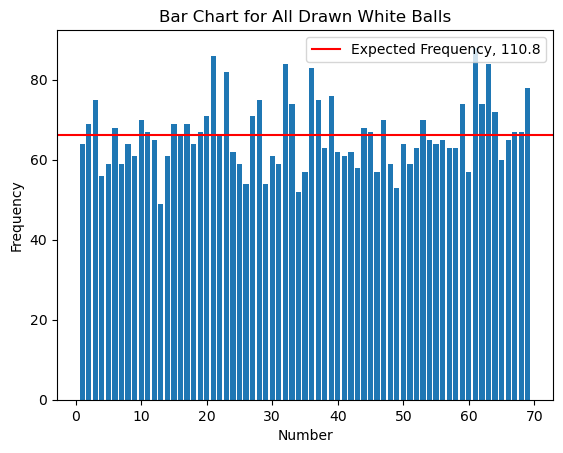

In [14]:
# Create a Bar Chart
plt.bar(all_white_frequency["Number"],
       all_white_frequency["count"])

# Create the expected value for frequency
expected_value = len(all_white_numbers) / 69

# Plot the expected_value
plt.axhline(y = expected_value, color = "red", label = "Expected Frequency, 110.8")

# Create Labels
plt.title("Bar Chart for All Drawn White Balls")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.legend()

# Show and Close the Plot
plt.show()
plt.close()

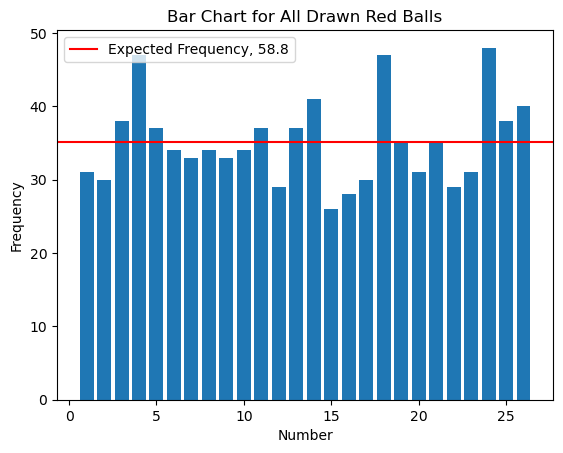

In [15]:
# Create a Bar Chart
plt.bar(all_red_frequency["Number"],
       all_red_frequency["count"])

# Create the expected value for frequency
expected_value = len(all_red_numbers) / 26

# Plot the expected_value
plt.axhline(y = expected_value, color = "red", label = "Expected Frequency, 58.8")

# Create Labels
plt.title("Bar Chart for All Drawn Red Balls")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.legend()

# Show and Close the Plot
plt.show()
plt.close()

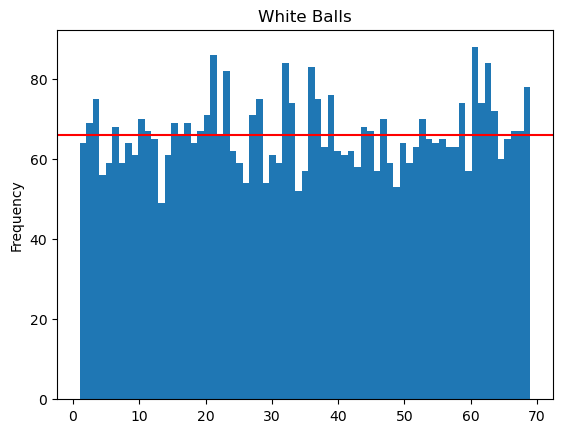

In [16]:
# Create a Histogram
plt.hist(all_white_numbers["Number"], range = (1, 69), bins = 69)

# Create the expected value for frequency
expected_value = len(all_white_numbers) / 69

# Plot the expected_value
plt.axhline(y = expected_value, color = "red", label = "Expected Frequency")

# Create Labels
plt.title("White Balls")
plt.ylabel("Frequency")

plt.show()
plt.close()

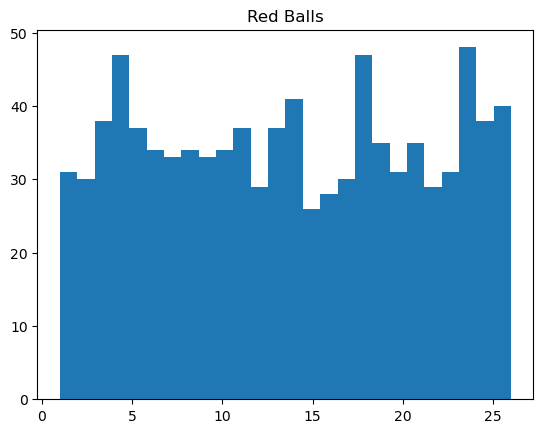

In [17]:
# Create a Histogram
plt.hist(all_red_numbers["Number"], range = (1, 26), bins = 26)

# Create Labels
plt.title("Red Balls")

plt.show()
plt.close()

In [18]:
# Create Sum Columns
lottery["Sum of White Balls"] = lottery["First Winning Number"] + lottery["Second Winning Number"] + lottery["Third Winning Number"] + lottery["Fourth Winning Number"] + lottery["Fifth Winning Number"]
lottery["Sum of All Balls"] = lottery["Sum of White Balls"] + lottery["Red Ball Number"]

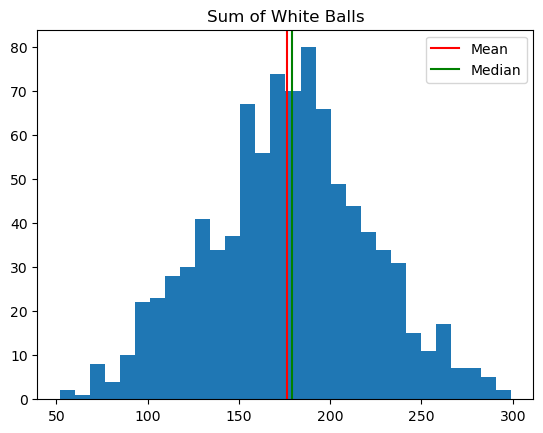

52
299


In [19]:
# Create a Histogram
plt.hist(lottery["Sum of White Balls"], bins = 30)

# Define the Median and Mean 
median = lottery["Sum of White Balls"].median()
mean = lottery["Sum of White Balls"].mean()

# Construct the Median and Mean Lines
plt.axvline(x = mean, color = "red", label = "Mean")
plt.axvline(x = median, color = "green", label = "Median")

# Create Labels
plt.title("Sum of White Balls")
plt.legend()

# Show and Close the Plot
plt.show()
plt.close()

print(np.min(lottery["Sum of White Balls"]))
print(np.max(lottery["Sum of White Balls"]))


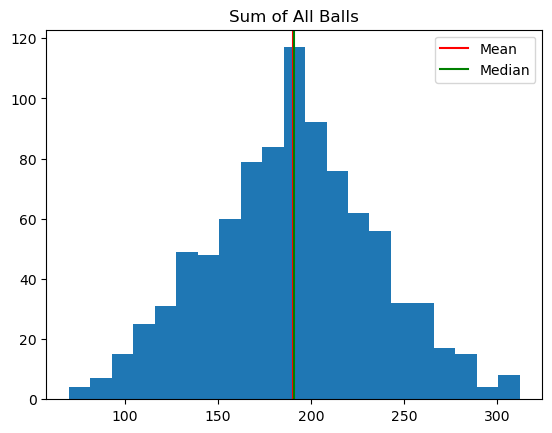

In [20]:
# Create a Histogram
plt.hist(lottery["Sum of All Balls"], bins = 21)

# Define the Median and Mean 
median = lottery["Sum of All Balls"].median()
mean = lottery["Sum of All Balls"].mean()

# Construct the Median and Mean Lines
plt.axvline(x = mean, color = "red", label = "Mean")
plt.axvline(x = median, color = "green", label = "Median")

# Create Labels
plt.title("Sum of All Balls")
plt.legend()

plt.show()
plt.close()

In [21]:
lottery.head()

,Draw Date,Winning Numbers,Multiplier,First Winning Number,Second Winning Number,Third Winning Number,Fourth Winning Number,Fifth Winning Number,Red Ball Number,Draw Month,Draw Day,Draw Year,Sum of White Balls,Sum of All Balls
0,09/26/2020,11 21 27 36 62 24,3.0,11,21,27,36,62,24,9,26,2020,157,181
1,09/30/2020,14 18 36 49 67 18,2.0,14,18,36,49,67,18,9,30,2020,184,202
2,10/03/2020,18 31 36 43 47 20,2.0,18,31,36,43,47,20,10,3,2020,175,195
3,10/07/2020,06 24 30 53 56 19,2.0,6,24,30,53,56,19,10,7,2020,169,188
4,10/10/2020,05 18 23 40 50 18,3.0,5,18,23,40,50,18,10,10,2020,136,154
